# Getting started

## Accessing data: an example

Check if `ipfnpytools` is in your pythonpath. Call the simple function to read signal data`getsig`. Import `matplotlib` so you can plot data later.

In [1]:
from ipfnpytools.getsig import getsig
import matplotlib.pyplot as plt
#plt.style.use('./Styles/darklab.mplstyle')

Let's read a signal from the AUG database. As an example we'll read the interferometer chords usually associated with core and edge density. A `shotfile` can hold several `signals`.
The `DCN` shotfile contains the`H-1` (core) and the `H-5` (edge) chords.
To read `H-1` first hust do:

In [2]:
shotnr = 30554
h1 = getsig(shotnr, 'DCN', 'H-1')

`h1` is an object that contains several data about the signal. The timebase of the data is always stored in an array called `time`. The data is always stored in an array called `data` and it is always SI, but you should always double check. Some signals are well documented in their shotfiles. If that is the case, you can use `.unit` to check the units of the system.

In [3]:
h1.time

array([0.0000e+00, 1.0000e-04, 2.0000e-04, ..., 9.9997e+00, 9.9998e+00,
       9.9999e+00], dtype=float32)

In [4]:
h1.data

array([1.39682516e+17, 1.39682516e+17, 1.39682516e+17, ...,
       1.01968236e+19, 1.01968236e+19, 1.00571416e+19], dtype=float32)

In [5]:
h1.unit

'1/m^3'

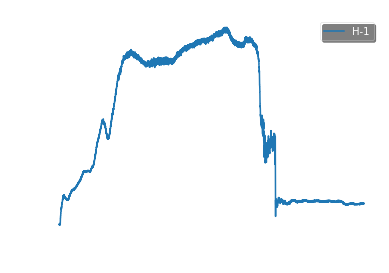

In [6]:
plt.plot(h1.time, h1.data, label=h1.name)
plt.xlabel('time [s]')
plt.ylabel(h1.unit)
plt.legend()
plt.show()

Let's do the same for the other chord.

In [13]:
h5 = getsig(shotnr, 'DCN', 'H-5')

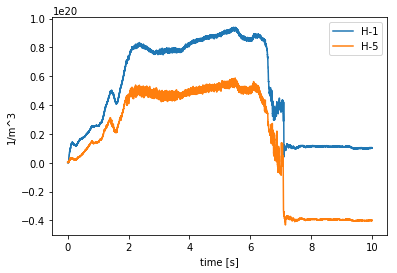

In [14]:
plt.plot(h1.time, h1.data, label=h1.name)
plt.plot(h5.time, h5.data, label=h5.name)
plt.xlabel('time [s]')
plt.ylabel(h1.unit)
plt.legend()
plt.show()

Interferometers might have fringe jumps, so it is normal to have to adjust the y axis.

## Time intervals

Instead of reading an entire signal, you can just determine an interval to read, from `tBegin` to `tEnd`.

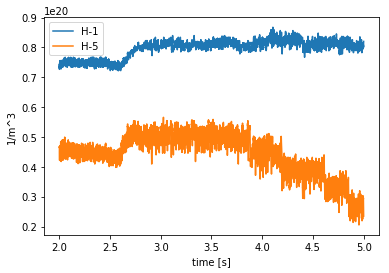

In [15]:
shotnr = 30733
h1 = getsig(shotnr, 'DCN', 'H-1', tBegin=2.0, tEnd=5.0)
h5 = getsig(shotnr, 'DCN', 'H-5', tBegin=2.0, tEnd=5.0)
plt.plot(h1.time, h1.data, label=h1.name)
plt.plot(h5.time, h5.data, label=h5.name)
plt.xlabel('time [s]')
plt.ylabel(h1.unit)
plt.legend()
plt.show()

## Experiment

Whilst the default is to read public data, you can access data with special settings from a user account. Instead of the default `AUGD` experiment, use the username of the person you wish to read data from as the argument of `exper`. In this example, we are showing how to read Wmhd from a shotfile that contains information about ELM properties, `ELM`, from the public database abd from user `guimas`.

In [9]:
shotnr = 36651
elmpub = getsig(shotnr, 'ELM', 'Wmhd')
elmpriv = getsig(shotnr, 'ELM', 'Wmhd', exper='guimas')
#plt.plot(h1.)

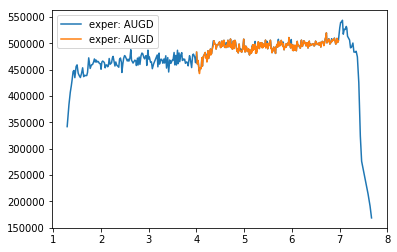

In [10]:
plt.plot(elmpub.time, elmpub.data, label='exper: AUGD')
plt.plot(elmpriv.time, elmpriv.data, label='exper: guimas')
plt.legend()
plt.show()

## Editions

Shot data can go over several iterations of processing. Settings can be improved, better calibrations can pe performed later, etc.. By default, the edition read is always the latest available, which is edition 0. Sometimes it is useful to keep several editions, as you can compare the impact of several processing steps. Choose the edition with the `edition` parameter.

In [6]:
shotnr = 36792
wmhd0 = getsig(shotnr, 'TOT', 'Wmhd')
wmhd2 = getsig(shotnr, 'TOT', 'Wmhd', edition=2)

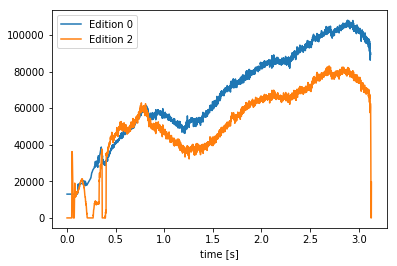

In [8]:
plt.plot(wmhd0.time, wmhd0.data, label='Edition 0')
plt.plot(wmhd2.time, wmhd2.data, label='Edition 2')
plt.legend()
plt.xlabel('time [s]')
plt.show()

## Signal groups

Some data are stored in a `signal-group` instead of a `signal`. While a signal is awlways 1D, a signal-group can be either 2D data, like density or temperature profiles, or a group of signals from a diagnostic with a common timebase, like the case of divertor spectroscopy densities.

In [13]:
shotnr = 36595
nediv = getsig(shotnr, 'FVL', 'Ne')

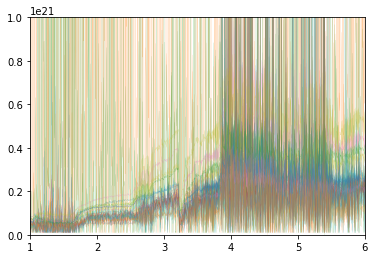

In [18]:
plt.plot(nediv.time, nediv.data, lw=0.1)
plt.xlim(1, 6)
plt.ylim(0,1e21)
plt.show()

## Profiles

Together with a `signal-group`, 2D data has an `area-base` object which is usually the spatial data associated to the former. In this example we'll read electron density data from the IDA shotfile.

In [19]:
shotnr = 36786
ne = getsig(shotnr, 'IDA', 'ne')

/afs/ipp/aug/ads-diags/common/python/lib/dd.py:1104: RuntimeWarning: Length of time base & 1st index of signal group "ne" not matching. Ignoring tBegin/tEnd as a precaution.
  RuntimeWarning)
/afs/ipp/aug/ads-diags/common/python/lib/dd.py:118: RuntimeWarning: Warning by DDcsgrp (8.1): No PARAM_SET found
  warnings.warn(err_txt, RuntimeWarning)


In [21]:
from ipfnpytools.closest import closest

In [22]:
time = 2.5
tind = closest(ne.time, time)

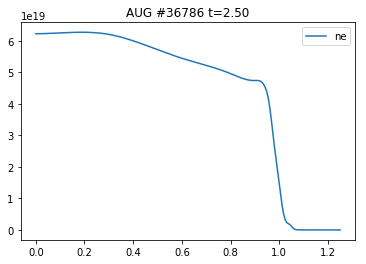

In [28]:
plt.plot(ne.area.data[tind,:], ne.data[tind,:], label=ne.name)
plt.title('AUG #%d t=%0.2f'%(shotnr, ne.time[tind]))
plt.legend()
plt.show()

Again, notice some information about units and other details might not be present in the shotfiles.